## 🌋 Python Lab: Vector Calculus and Optimization
> [Principles of ML course](https://github.com/mnarimani/PML_Spring2025_SUT) - Spring 2025 - Sharif <br>
> Lab sessions - Session 4 - March 8, 2025 <br>
> Author: M Narimani <br>

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/mnarimani/PML_Spring2025_SUT/blob/main/Week04/02_Optim_TODO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/mnarimani/PML_Spring2025_SUT/blob/main/Week04/02_Optim_TODO.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## 🛠️ Setup: Importing Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import sympy as sp

In [5]:
# Set random seed for reproducibility
np.random.seed(42)

## 1️⃣ Gradients and Directional Derivatives

The gradient of a function
- points in _the direction of steepest ascent_, and
- is _perpendicular_ to the contour lines.

#### Defining the Function


In [8]:
# Example function: f(x, y) = x^2 + 2y^2
def f(x, y):
    return x**2 + 2*y**2

#### Deriving Partial Derivatives

In [10]:
def grad_f(x, y):
    return 2*x, 4*y

#### Plotting Gradient Field

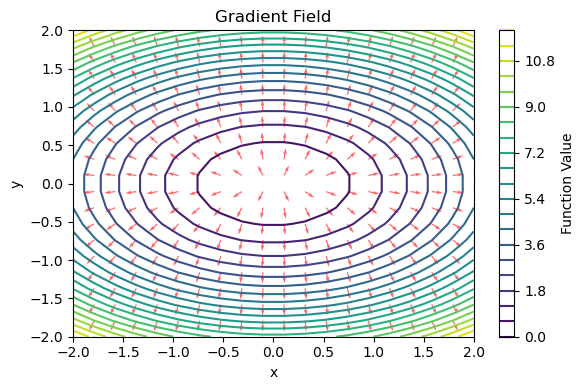

In [16]:
num_points = 20
x_range, y_range = (-2, 2), (-2, 2)

# Create grid of points
x = np.linspace(x_range[0], x_range[1], num_points)
y = np.linspace(y_range[0], y_range[1], num_points)
X, Y = np.meshgrid(x, y)

# Compute function values
Z = np.zeros_like(X)
for i in range(num_points):
    for j in range(num_points):
        Z[i, j] = f(X[i, j], Y[i, j])

# Compute gradient at each point
U = np.zeros_like(X)
V = np.zeros_like(Y)
for i in range(num_points):
    for j in range(num_points):
        U[i, j], V[i, j] = grad_f(X[i, j], Y[i, j])

# Normalize gradient vectors for visualization
norm = np.sqrt(U**2 + V**2)
U_norm = U / (norm + 1e-8)  # prevent division by zero
V_norm = V / (norm + 1e-8)

# Create plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot contour
contour = ax.contour(X, Y, Z, 20, cmap='viridis')
plt.colorbar(contour, ax=ax, label='Function Value')

# Plot gradient field
ax.quiver(X, Y, U_norm, V_norm, color='r', alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Gradient Field')
plt.tight_layout()
plt.show()

## 2️⃣ Computing Gradients Symbolically and Numerically

#### Symbolic Gradient Computation

In [15]:
# Define symbolic variables
x, y = sp.symbols('x y')

# Define a symbolic function
f_symbolic = x**2 * sp.exp(-(x**2 + y**2)) + y**2

# Compute gradient symbolically
grad_f_symbolic = [sp.diff(f_symbolic, var) for var in (x, y)]

print(f"Function: {f_symbolic}")
print(f"Gradient:")
print(f"∂f/∂x = {grad_f_symbolic[0]}")
print(f"∂f/∂y = {grad_f_symbolic[1]}")

Function: x**2*exp(-x**2 - y**2) + y**2
Gradient:
∂f/∂x = -2*x**3*exp(-x**2 - y**2) + 2*x*exp(-x**2 - y**2)
∂f/∂y = -2*x**2*y*exp(-x**2 - y**2) + 2*y


In [16]:
# Convert symbolic expressions to Python functions
f_lambda = sp.lambdify((x, y), f_symbolic, 'numpy')
grad_f_x_lambda = sp.lambdify((x, y), grad_f_symbolic[0], 'numpy')
grad_f_y_lambda = sp.lambdify((x, y), grad_f_symbolic[1], 'numpy')

def grad_f_lambda(x_val, y_val):
    return grad_f_x_lambda(x_val, y_val), grad_f_y_lambda(x_val, y_val)

#### Numerical Gradient Computation

> **TODO**: Implement a function to compute the gradient numerically using finite differences
> The function should take:
> - `f`: a function that takes `x, y` and returns `z`
> - `x, y`: the point at which to compute the gradient
> - `h`: a small value for the finite difference (default: `1e-5`) <br>
> and return (`df/dx, df/dy`) computed using the central difference method

In [19]:
# def compute_numerical_gradient(f, x, y, h=1e-5):
#     # YOUR CODE HERE
#     # Hint: The central difference formula is: df/dx ≈ [f(x+h, y) - f(x-h, y)] / (2*h)
#     # Compute df/dx using central difference

#     # Compute df/dy using central difference

#     pass

#### Comparing Analytical and Numerical Gradients

In [21]:
# Example usage:
x_test, y_test = 0.5, -0.3
analytical_gradient = grad_f_lambda(x_test, y_test)
print(f"Analytical gradient at ({x_test}, {y_test}): {analytical_gradient}")

Analytical gradient at (0.5, -0.3): (0.5338277420719573, -0.4932344515856085)


> **TODO**: Uncomment and complete:

In [23]:
# numerical_gradient = # YOUR CODE HERE
# print(f"Numerical gradient at ({x_test}, {y_test}): {numerical_gradient}")

Numerical gradient at (0.5, -0.3): (0.5338277419802973, -0.49323445159565876)


In [24]:
# Compare the results
error = np.sqrt((analytical_gradient[0] - numerical_gradient[0])**2 + 
                (analytical_gradient[1] - numerical_gradient[1])**2)
print(f"Error between analytical and numerical gradients: {error}")

Error between analytical and numerical gradients: 9.220935559640984e-11


> **Exercise**: Gradient Computation <br>
> Compute the gradient of f(x,y) = sin(x) * cos(y) + x^2 * y both analytically and numerically. <br>
> Compare the results at different points.

## 3️⃣ Gradient Descent Visualization

#### Implementing Gradient Descent

> **TODO**: Implement the gradient descent algorithm
> 1. Initialize the current point as the starting point
> 2. For each iteration:
>    - Compute the gradient at the current point
>    - Update the current point by subtracting the `gradient * learning_rate`
>    - Store the new point and its function value
>    - Check for convergence (if gradient magnitude is below tolerance)
> 3. Return the path and function values

In [28]:
# def gradient_descent(f, grad_f, start, learning_rate=0.1, max_iterations=100, tol=1e-6):
#     path = [start]
#     function_values = [f(start[0], start[1])]
    
#     current = start
    
#     for i in range(max_iterations):
#         # Compute gradient
#         # grad_x, grad_y =                                   # YOUR CODE HERE
        
#         # Check for convergence
#         if np.sqrt(grad_x**2 + grad_y**2) < tol:
#             print(f"Converged after {i+1} iterations")
#             break
        
#         # Update position (gradient descent step)
#         # current =                                          # YOUR CODE HERE
        
#         # Store new position and function value
#         # path.append(??)                                    # YOUR CODE HERE
#         # function_values.append(??)                         # YOUR CODE HERE
    
#     return [], []  # Return path and function values

#### Visualizing Gradient Descent on Different Functions


In [30]:
def plot_3d_function(f, x_range, y_range, title, ax=None):
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])
    
    if ax is None:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, alpha=0.8, linewidth=0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    ax.set_title(title)
    
    return ax

In [31]:
# Define a few test functions to optimize
def bowl_function(x, y):
    return x**2 + y**2

def bowl_gradient(x, y):
    return 2*x, 2*y

In [ ]:
def rosenbrock_function(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosenbrock_gradient(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return dx, dy

In [ ]:
def saddle_function(x, y):
    return x**2 - y**2

def saddle_gradient(x, y):
    return 2*x, -2*y

Converged after 68 iterations


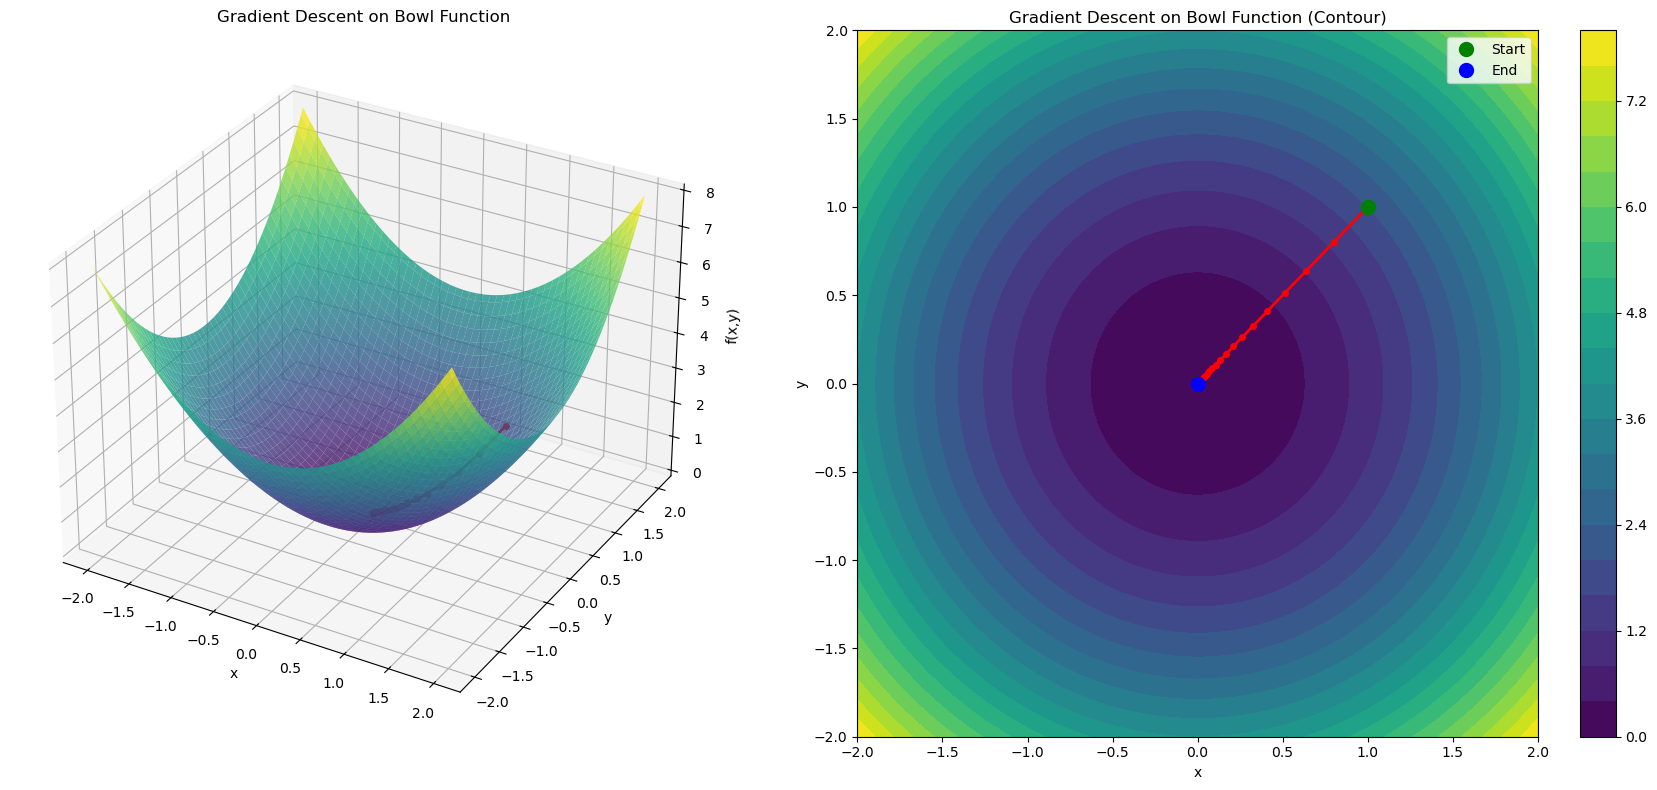

In [103]:
# Visualize a gradient descent path on a contour plot
def visualize_gradient_descent(f, grad_f, start, title, x_range, y_range, learning_rate=0.1):
    # Run gradient descent
    path, values = gradient_descent(f, grad_f, start, learning_rate=learning_rate)
    
    # Extract x and y coordinates from path
    path_x = [p[0] for p in path]
    path_y = [p[1] for p in path]
    
    # Create a figure with two subplots side by side
    fig = plt.figure(figsize=(18, 8))
    
    # First subplot: 3D surface
    ax1 = fig.add_subplot(121, projection='3d')
    plot_3d_function(f, x_range, y_range, title, ax=ax1)
    
    # Plot path on 3D surface
    path_z = [f(x, y) for x, y in path]
    ax1.plot(path_x, path_y, path_z, 'r-o', linewidth=2, markersize=4)
    
    # Second subplot: Contour with path
    ax2 = fig.add_subplot(122)
    
    # Create grid
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])
    
    # Plot contour
    contour = ax2.contourf(X, Y, Z, 20, cmap='viridis')
    plt.colorbar(contour, ax=ax2)
    
    # Plot path
    ax2.plot(path_x, path_y, 'r-o', linewidth=2, markersize=4)
    ax2.plot(path_x[0], path_y[0], 'go', markersize=10, label='Start')
    ax2.plot(path_x[-1], path_y[-1], 'bo', markersize=10, label='End')
    
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title(f'{title} (Contour)')
    ax2.legend()
    
    plt.tight_layout()
    return fig, path, values

# Example usage:
start_point = (1.0, 1.0)
visualize_gradient_descent(bowl_function, bowl_gradient, start_point, 
                           "Gradient Descent on Bowl Function", 
                           (-2, 2), (-2, 2), learning_rate=0.1)
plt.show()

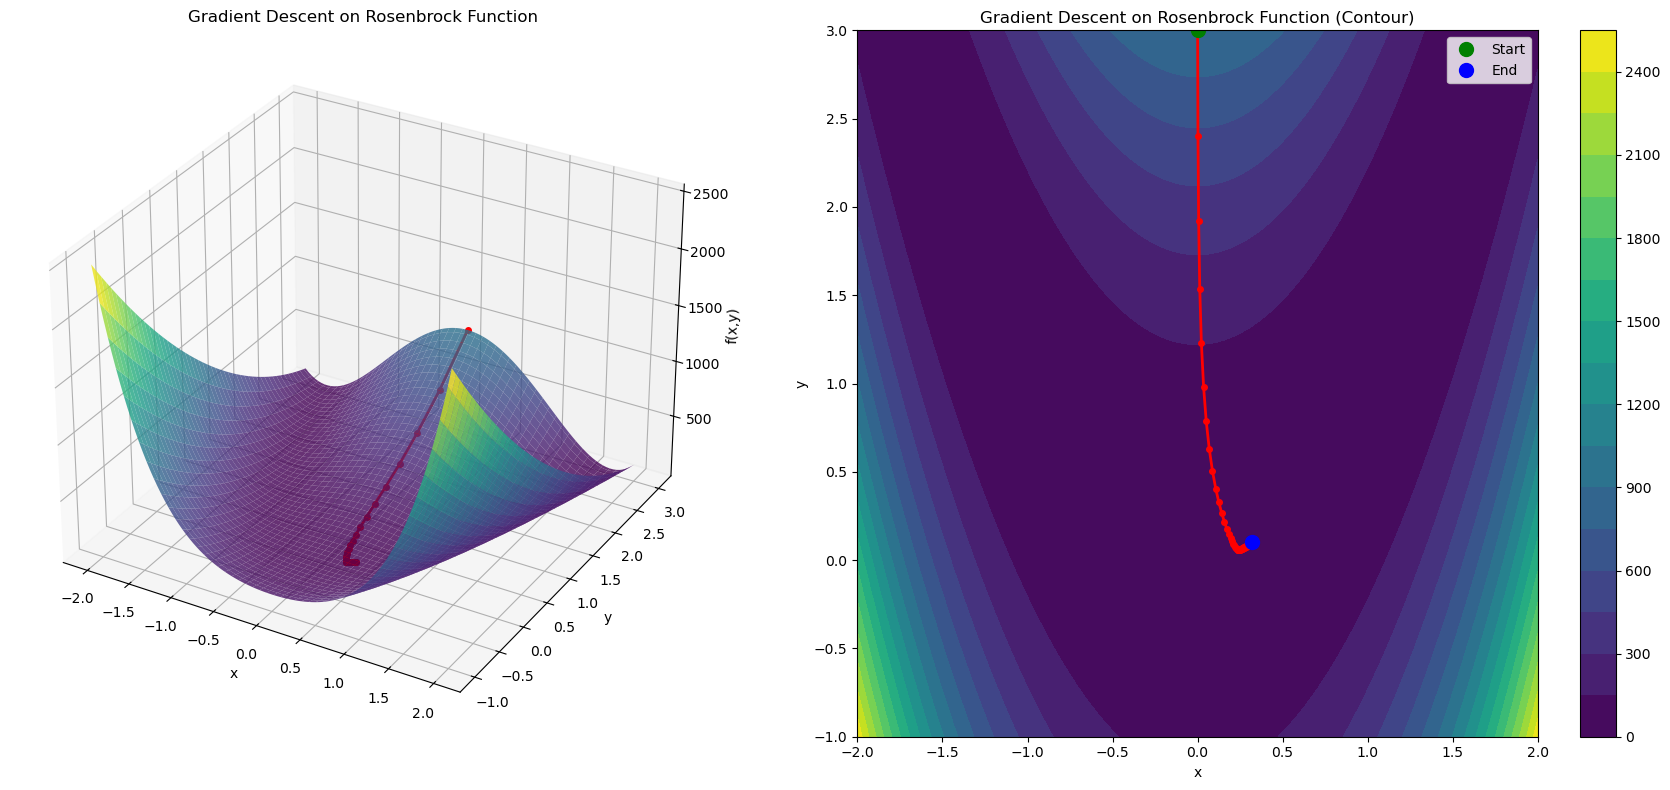

In [105]:
visualize_gradient_descent(rosenbrock_function, rosenbrock_gradient, (0, 3), 
                          "Gradient Descent on Rosenbrock Function", 
                          (-2, 2), (-1, 3), learning_rate=0.001)
plt.show()

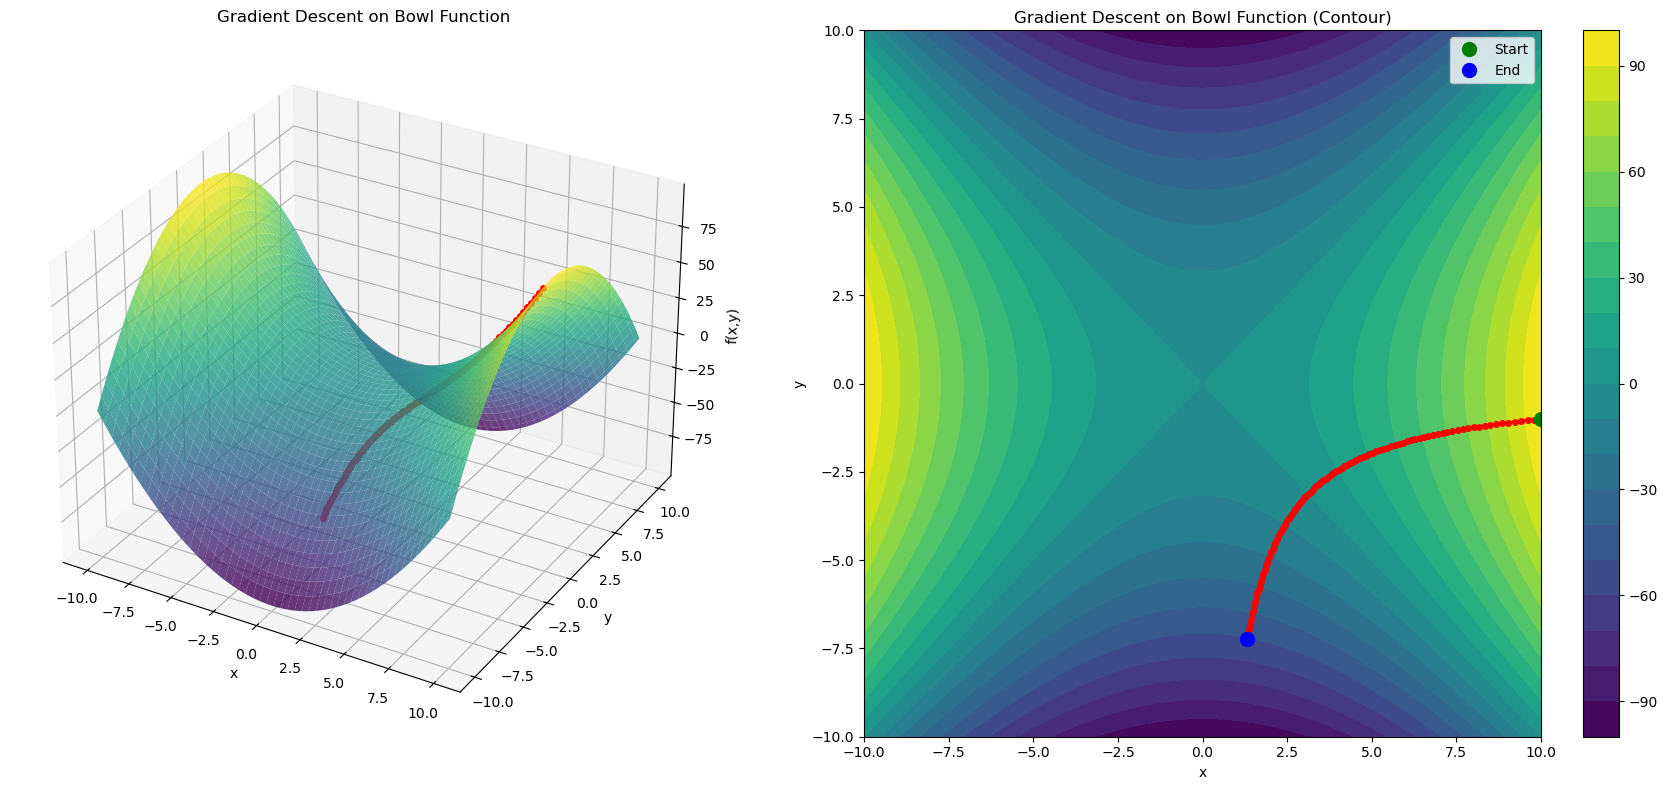

In [107]:
visualize_gradient_descent(saddle_function, saddle_gradient, (10,-1), 
                           "Gradient Descent on Bowl Function", 
                           (-10, 10), (-10, 10), learning_rate=0.01)
plt.show()

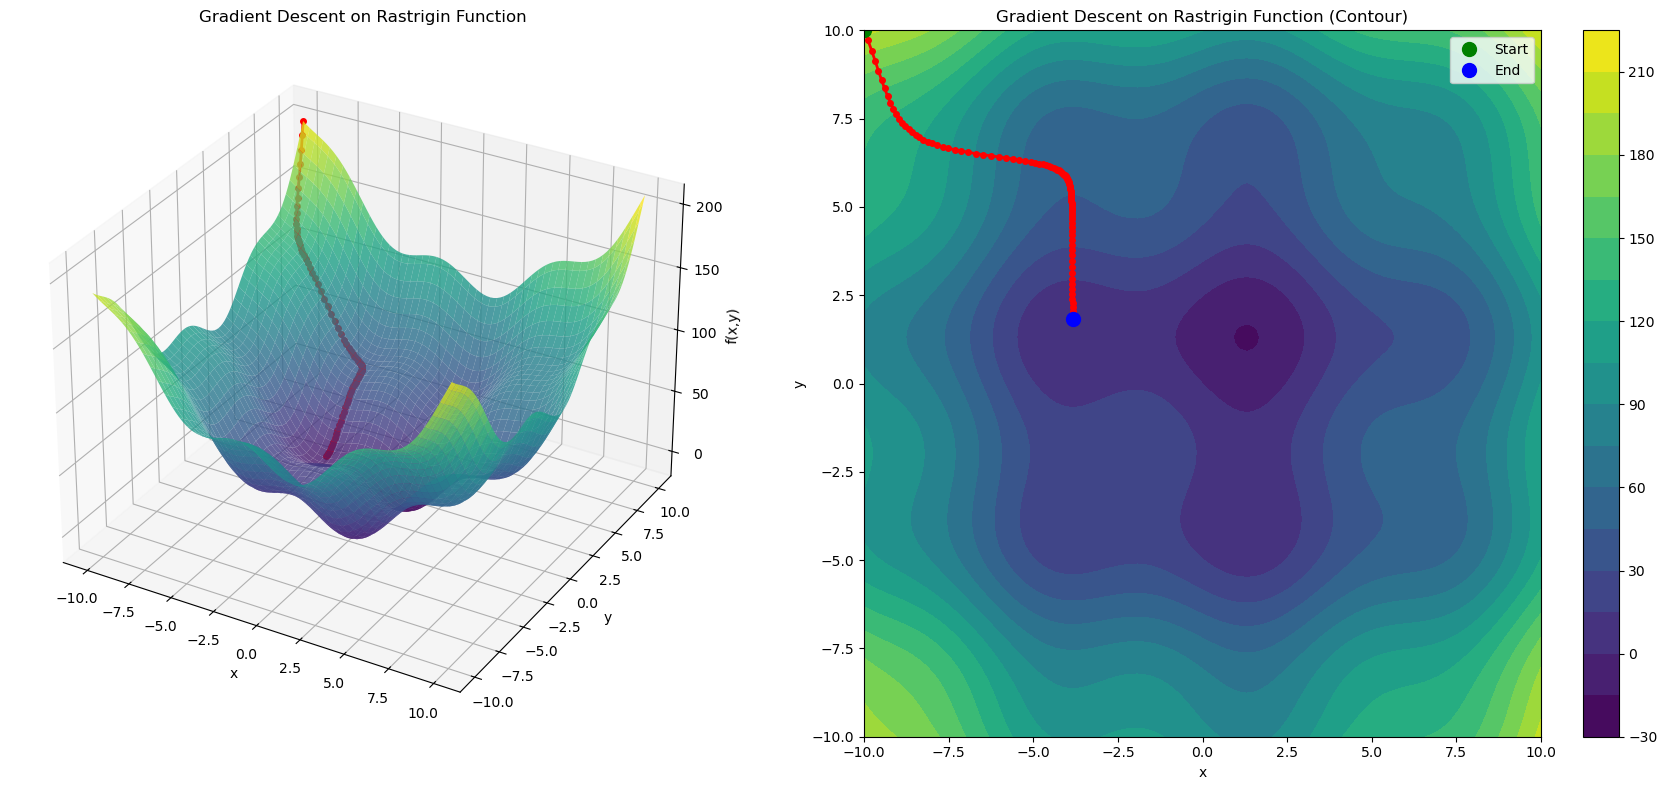

In [109]:
def rastrigin_function(x, y):
    return (x**2 + y**2 - 10*np.sin(x) - 10*np.sin(y))

def gradient_rastrigin(x, y):
    dx = 2*x - 10*np.cos(x)
    dy = 2*y - 10*np.cos(y)
    return dx, dy

visualize_gradient_descent(rastrigin_function, gradient_rastrigin, 
                          (-10, 10), 
                          "Gradient Descent on Rastrigin Function", 
                          (-10, 10), (-10, 10), learning_rate=0.01)
plt.show()

> **Exercise**: Try running gradient descent on: <br>
> Himmelblau's function: `f(x,y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2`

## 4️⃣ Learning Rate and Momentum

#### Effects of Different Learning Rates

Converged after 18 iterations


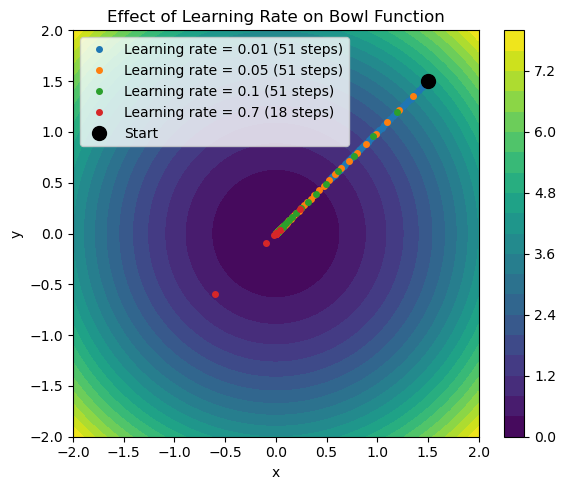

In [115]:
def compare_learning_rates(f, grad_f, start, title, x_range, y_range, learning_rates):
    # Create grid for contour plot
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Plot contour
    contour = ax.contourf(X, Y, Z, 20, cmap='viridis')
    plt.colorbar(contour, ax=ax)
    
    # Run gradient descent with different learning rates and plot paths
    for lr in learning_rates:
        path, values = gradient_descent(f, grad_f, start, learning_rate=lr, max_iterations=50)
        path_x = [p[0] for p in path]
        path_y = [p[1] for p in path]
        
        ax.plot(path_x, path_y, 'o', linewidth=2, markersize=4, 
                label=f'Learning rate = {lr} ({len(path)} steps)')
    
    ax.plot(start[0], start[1], 'ko', markersize=10, label='Start')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Effect of Learning Rate on {title}')
    ax.legend()
    
    plt.tight_layout()
    return fig

# Example usage:
learning_rates = [0.01, 0.05, 0.1, 0.7]
compare_learning_rates(bowl_function, bowl_gradient, (1.5, 1.5), 
                      "Bowl Function", (-2, 2), (-2, 2), learning_rates)
plt.show()

## 💡 Implementing Momentum

> **TODO**: Implement gradient descent with momentum <br>
> The function should be similar to the original `gradient_descent` function <br>
> but it should use momentum to update the parameters

In [41]:
def gradient_descent_with_momentum(f, grad_f, start, learning_rate=0.1, 
                                  momentum=0.9, max_iterations=100, tol=1e-6):
    # YOUR CODE HERE
    # Hint: Initialize velocity as zeros and use it to accumulate gradients
    # v = [0, 0]  # Initial velocity
    # Then update velocity: v = momentum * v - learning_rate * gradient
    # And update position: current = current + v
    
    return [], []  # Return path and function values

#### Compare Standard Gradient Descent vs. Momentum

Converged after 71 iterations
Converged after 162 iterations


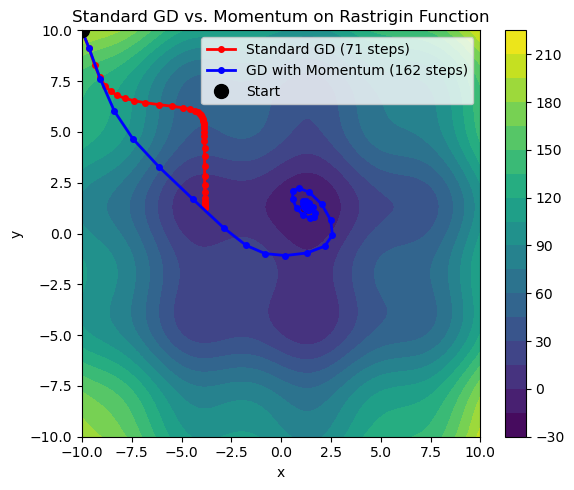

In [135]:
def compare_gd_methods(f, grad_f, start, title, x_range, y_range):
    # Create grid for contour plot
    x = np.linspace(x_range[0], x_range[1], 100)
    y = np.linspace(y_range[0], y_range[1], 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = f(X[i, j], Y[i, j])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Plot contour
    contour = ax.contourf(X, Y, Z, 20, cmap='viridis')
    plt.colorbar(contour, ax=ax)
    
    # Run standard gradient descent
    path_std, values_std = gradient_descent(f, grad_f, start, learning_rate=0.03, max_iterations=500)
    path_x_std = [p[0] for p in path_std]
    path_y_std = [p[1] for p in path_std]
    
    ax.plot(path_x_std, path_y_std, 'r-o', linewidth=2, markersize=4, 
            label=f'Standard GD ({len(path_std)} steps)')
    
    # Run gradient descent with momentum
    path_mom, values_mom = gradient_descent_with_momentum(f, grad_f, start, 
                                                         learning_rate=0.03, 
                                                         momentum=0.8, 
                                                         max_iterations=500)
    path_x_mom = [p[0] for p in path_mom]
    path_y_mom = [p[1] for p in path_mom]
    
    ax.plot(path_x_mom, path_y_mom, 'b-o', linewidth=2, markersize=4, 
            label=f'GD with Momentum ({len(path_mom)} steps)')
    
    ax.plot(start[0], start[1], 'ko', markersize=10, label='Start')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'Standard GD vs. Momentum on {title}')
    ax.legend()
    
    plt.tight_layout()
    return fig

compare_gd_methods(rastrigin_function, gradient_rastrigin, (-10, 10), 
                   "Rastrigin Function", (-10, 10), (-10, 10))
plt.show()

## 5️⃣ Constrained Optimization with Lagrange Multipliers
Minimize $f(x, y) = x^2 + y^2$ subject to $x + y = 1$.

#### Symbolic computation for Lagrangian

In [45]:
# Define symbolic variables
x, y, lambda_var = sp.symbols('x y λ')

# Define the function to optimize and the constraint
f = x**2 + y**2  # Function to minimize
g = x + y - 1    # Constraint: x + y = 1

# Form the Lagrangian: L(x, y, λ) = f(x, y) - λ * g(x, y)
L = f - lambda_var * g

# Compute partial derivatives
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)
dL_dlambda = sp.diff(L, lambda_var)

# Solve the system of equations
lagrangian_solutions = sp.solve([dL_dx, dL_dy, dL_dlambda], [x, y, lambda_var])

if lagrangian_solutions:
    print("\nOptimal Solution:")
    # Access values using symbol keys from the solution dictionary
    x_val = lagrangian_solutions[x]
    y_val = lagrangian_solutions[y]
    lambda_val = lagrangian_solutions[lambda_var]
    f_val = x_val**2 + y_val**2
    print(f"x = {x_val}, y = {y_val}, λ = {lambda_val}")
    print(f"Minimum value f(x, y) = {f_val}")


Optimal Solution:
x = 1/2, y = 1/2, λ = 1
Minimum value f(x, y) = 1/2


#### Visual representation of constrained optimization

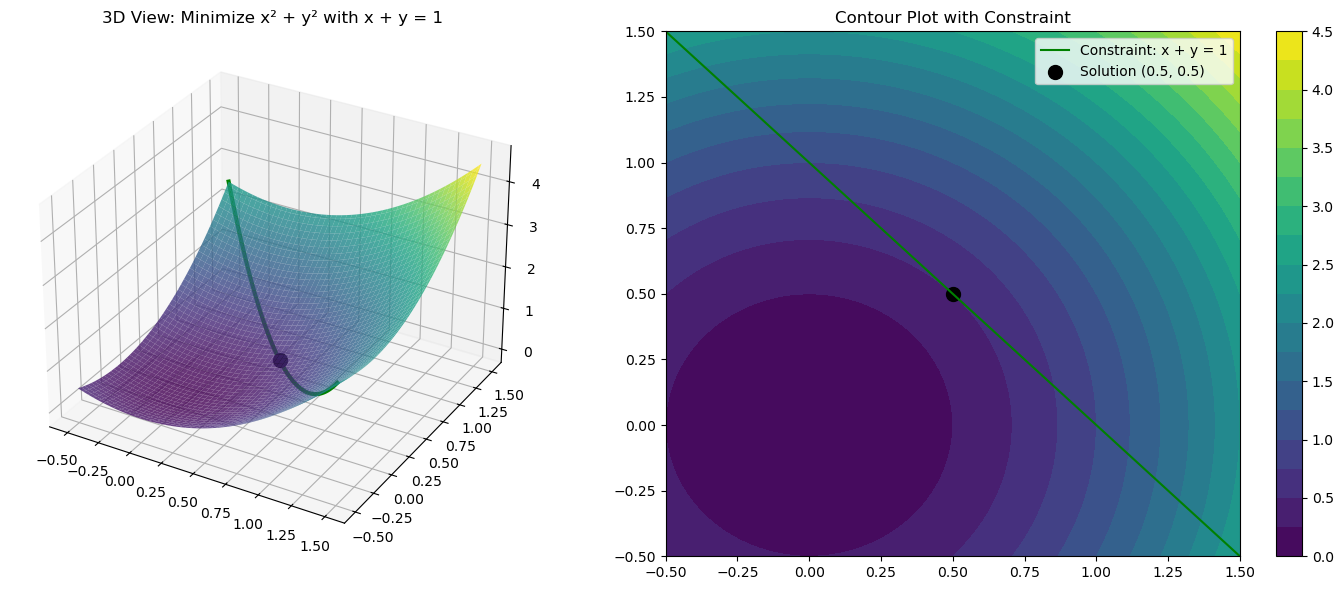

In [137]:
# Define the function and constraint
def f(x, y):
    return x**2 + y**2

def constraint(x):
    return 1 - x  # y = 1 - x

# Create the figure
fig = plt.figure(figsize=(15, 6))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')

# Plot the function surface
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8, linewidth=0)

# Plot the constraint curve on the surface
x_constraint = np.linspace(-0.5, 1.5, 100)
y_constraint = constraint(x_constraint)
z_constraint = f(x_constraint, y_constraint)

ax1.plot(x_constraint, y_constraint, z_constraint, 'g-', linewidth=3)

# Mark the solution point
if lagrangian_solutions:
    z_sol = f(x_val, y_val)
    ax1.scatter([x_val], [y_val], [z_sol], color='k', s=100, marker='o')

ax1.set_title('3D View: Minimize x² + y² with x + y = 1')

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, 20, cmap='viridis')
plt.colorbar(contour, ax=ax2)
ax2.plot(x_constraint, y_constraint, 'g-', label='Constraint: x + y = 1')

if lagrangian_solutions:
    ax2.scatter([x_val], [y_val], color='k', s=100, label=f'Solution ({x_val:.1f}, {y_val:.1f})')

ax2.set_title('Contour Plot with Constraint')
ax2.legend()
plt.tight_layout()
plt.show()

## 6️⃣ Application to Linear Regression

#### Generating Data
Create noisy linear data: $y = 2x + 1 + \text{noise}$.

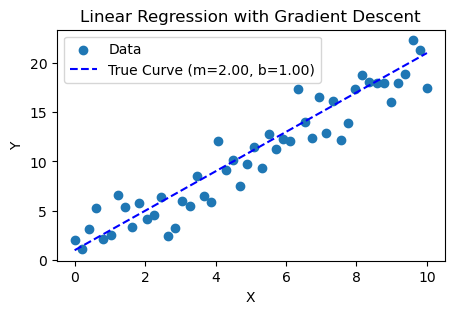

In [50]:
# True parameters
true_slope = 2
true_intercept = 1

# Generate data
x_data = np.linspace(0, 10, 50)
y_data = true_slope * x_data + true_intercept + np.random.randn(50) * 2

# Plot data and fitted line
plt.figure(figsize=(5, 3))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, true_slope * x_data + true_intercept, 'b--', label=f'True Curve (m={true_slope:.2f}, b={true_intercept:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

#### Cost Function
The cost function is the _mean squared error_ (MSE):

$J(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))^2$

**TODO:** Implement the cost function.

In [53]:
# def cost_function(m, b, x_data, y_data):
#     n = len(x_data)
#     # TODO: Compute predicted y values
#     # y_pred = ???
#     # TODO: Compute MSE
#     # mse = np.mean(???)
#     return mse

#### Computing Gradients for Linear Regression
The gradients are:
- $\frac{\partial J}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - (m x_i + b))$
- $\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (m x_i + b))$

**TODO:** Implement the gradient functions.

In [56]:
# def grad_m(m, b, x_data, y_data):
#     n = len(x_data)
#     # TODO: Compute gradient with respect to m
#     y_pred = ???
#     grad = -2/n * np.sum(???)
#     return grad

# def grad_b(m, b, x_data, y_data):
#     n = len(x_data)
#     # TODO: Compute gradient with respect to b
#     y_pred = ???
#     grad = -2/n * np.sum(???)
#     return grad

#### Implementing Gradient Descent for Linear Regression
Let’s find the optimal slope $m$ and intercept $b$.

**TODO:** Complete the gradient descent function.

In [59]:
# def gradient_descent_lr(start_m, start_b, learning_rate, num_iterations, x_data, y_data):
#     m = start_m
#     b = start_b
#     history = [(m, b)]
#     for _ in range(num_iterations):
#         # TODO: Compute gradients
#         grad_m_val = ???
#         grad_b_val = ???
#         # TODO: Update m and b
#         m = ???
#         b = ???
#         history.append((m, b))
#     return history

#### Running Gradient Descent and Visualizing the Fit
Let’s fit the model and visualize the result.

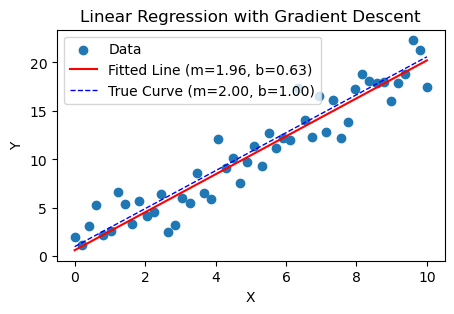

In [61]:
# Parameters
start_m, start_b = 0, 0  # Initial guesses
learning_rate = 0.01     # Step size
num_iterations = 100     # Number of steps

# Run gradient descent
history = gradient_descent_lr(start_m, start_b, learning_rate, num_iterations, x_data, y_data)
final_m, final_b = history[-1]

# Plot data and fitted line
plt.figure(figsize=(5, 3))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, final_m * x_data + final_b, color='red', label=f'Fitted Line (m={final_m:.2f}, b={final_b:.2f})')
plt.plot(x_data, final_m * x_data + true_intercept, 'b--', linewidth=1, label=f'True Curve (m={true_slope:.2f}, b={true_intercept:.2f})')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

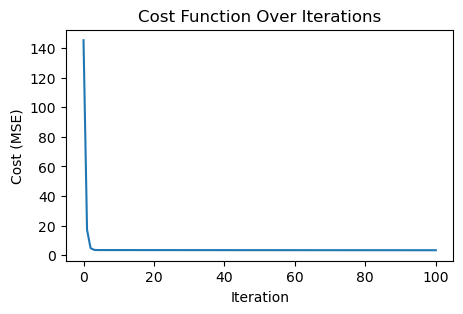

In [94]:
# Plot cost over iterations
costs = [cost_function(m, b, x_data, y_data) for m, b in history]
plt.figure(figsize=(5, 3))
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
# plt.ylim([0, 10])
plt.show()

> **Exercise**: Real-world Application <br>
> Apply gradient descent to a small dataset of your choice: <br>
> 1. Load a simple dataset (e.g., housing prices, student scores) <br>
> 2. Implement a linear or polynomial regression model using gradient descent <br>
> 3. Visualize the results and the optimization process <br>